# Mobile Price Classification

In this project, I am tasked with assisting my manager, who is workingin a  mobile company, in determining the appropriate price range for the mobile phones his company produces. He has gathered sales data from various companies to understand the relationship between a mobile phone's features (like RAM, internal memory, etc.) and its selling price. Instead of predicting the exact selling price, the goal is to classify these mobile phones into different price ranges, indicating the relative costliness of each phone.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [29]:
pd.options.mode.chained_assignment = None  # default='warn'

In [31]:
data=pd.read_csv("/content/train.csv")

In [32]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


The dataset contains 2000 entries and 21 columns. Here's an overview of the columns:

**battery_power:** Numeric, representing battery power.

**blue:** Binary (0 or 1), indicating the presence of Bluetooth.

**clock_speed:** Numeric, representing the speed of the processor.

**dual_sim:** Binary (0 or 1), indicating if the device supports dual SIM.

**fc: **Numeric, representing the megapixel of the front camera.

**four_g:** Binary (0 or 1), indicating the support for 4G.

**int_memory:** Numeric, representing the internal memory in Gigabytes.

**m_dep:** Numeric, representing the mobile depth in cm.

**mobile_wt:** Numeric, representing the weight of the mobile phone.

**n_cores:** Numeric, representing the number of cores of the processor.

**pc:** Numeric, representing the megapixel of the primary camera.

**px_height:** Numeric, representing the pixel resolution height.

**px_width:** Numeric, representing the pixel resolution width.

**ram:** Numeric, representing the random access memory in Megabytes.

**sc_h:** Numeric, representing the screen height of the mobile in cm.

**sc_w:** Numeric, representing the screen width of the mobile in cm.

**talk_time:** Numeric, representing the longest time that a single battery charge will last when you are talking on the phone.

**three_g:** Binary (0 or 1), indicating the support for 3G.

**touch_screen:** Binary (0 or 1), indicating the presence of a touch screen.

**wifi:** Binary (0 or 1), indicating the presence of WiFi capability.

**price_range:** Numeric, representing the price range of the mobile device.

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



*  There is no missing value in the dataset.
* We have 8 categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi
* We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w



In [7]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index([], dtype='object')

In [34]:
df_categorical = data[['price_range', 'n_cores', 'blue', 'dual_sim',
                    'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

pd.DataFrame({'Numer of Unique Values': unique_counts, 'Unique Values': unique_values})

,Numer of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


In [35]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

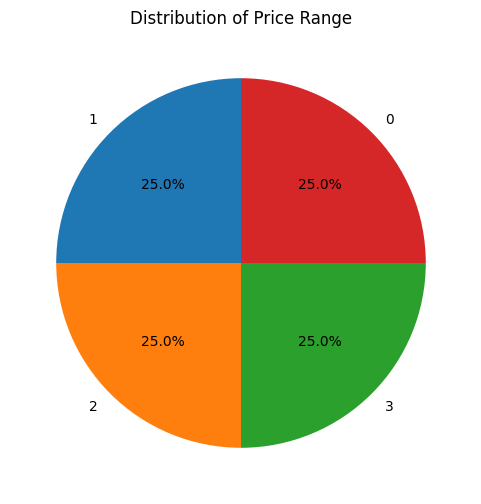

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(data.price_range.value_counts(), labels=data.price_range.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Price Range')
plt.show()

Mobile phones are divided with exactly the same frequency across the 4 price_range classes. Therefore, the dataset is completely balanced.

In [37]:
data_for_prediction = data.tail(5)

In [38]:
data = data.iloc[:-5]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1995 non-null   int64  
 1   blue           1995 non-null   int64  
 2   clock_speed    1995 non-null   float64
 3   dual_sim       1995 non-null   int64  
 4   fc             1995 non-null   int64  
 5   four_g         1995 non-null   int64  
 6   int_memory     1995 non-null   int64  
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1995 non-null   int64  
 9   n_cores        1995 non-null   int64  
 10  pc             1995 non-null   int64  
 11  px_height      1995 non-null   int64  
 12  px_width       1995 non-null   int64  
 13  ram            1995 non-null   int64  
 14  sc_h           1995 non-null   int64  
 15  sc_w           1995 non-null   int64  
 16  talk_time      1995 non-null   int64  
 17  three_g        1995 non-null   int64  
 18  touch_sc

In [14]:
numeric_feature_names = data.columns.drop('price_range')
numeric_features = data[numeric_feature_names]

In [15]:
numeric_features_tensor = tf.convert_to_tensor(numeric_features)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features_tensor)

In [16]:
def price_classifier():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

In [17]:
BATCH_SIZE = 128
target = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

In [18]:
model = price_classifier()

In [19]:
model.fit(X_train, y_train, epochs=1500, batch_size=BATCH_SIZE)

Epoch 1/1500
13/13 [==============================] - 5s 4ms/step - loss: 8.5358 - accuracy: 0.2431
Epoch 2/1500
13/13 [==============================] - 0s 4ms/step - loss: 6.1719 - accuracy: 0.2469
Epoch 3/1500
13/13 [==============================] - 0s 4ms/step - loss: 4.2643 - accuracy: 0.2450
Epoch 4/1500
13/13 [==============================] - 0s 4ms/step - loss: 2.5392 - accuracy: 0.2456
Epoch 5/1500
13/13 [==============================] - 0s 4ms/step - loss: 0.9366 - accuracy: 0.2494
Epoch 6/1500
13/13 [==============================] - 0s 4ms/step - loss: -0.9710 - accuracy: 0.2575
Epoch 7/1500
13/13 [==============================] - 0s 4ms/step - loss: -2.5584 - accuracy: 0.2563
Epoch 8/1500
13/13 [==============================] - 0s 4ms/step - loss: -3.6275 - accuracy: 0.2588
Epoch 9/1500
13/13 [==============================] - 0s 4ms/step - loss: -4.8957 - accuracy: 0.2644
Epoch 10/1500
13/13 [==============================] - 0s 4ms/step - loss: -5.3981 - accuracy: 0

In [20]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]:.2f}   /   Test Accuracy: {score[1]*100:.2f}%")

13/13 [==============================] - 0s 6ms/step - loss: -11.5106 - accuracy: 0.4461
Test loss: -11.51   /   Test Accuracy: 44.61%


In [21]:
numeric_feature_names = data_for_prediction.columns.drop('price_range')
numeric_features = data_for_prediction[numeric_feature_names]

In [22]:
numeric_test_features_tensor = tf.convert_to_tensor(numeric_features)

In [23]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_test_features_tensor)

In [24]:
score=model.evaluate(numeric_test_features_tensor, data_for_prediction['price_range'])
print(f"Test loss: {score[0]:.2f}   /   Test Accuracy: {score[1]*100:.2f}%")


1/1 [==============================] - 0s 25ms/step - loss: -15.2492 - accuracy: 0.4000
Test loss: -15.25   /   Test Accuracy: 40.00%


In [41]:
data_for_prediction = data_for_prediction.drop('price_range', axis = 1)

In [42]:
# Predict labels

class_names = ['0','1', '2', '3']

predictions = model(numeric_test_features_tensor, training=False)

# Create new columns in dataframe
data_for_prediction['label'] = None
data_for_prediction['certainty'] = None

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

  # Save predictions to dataframe
  data_for_prediction["label"].iloc[i] = name
  data_for_prediction['certainty'].iloc[i] = format(p)

Example 0 prediction: 0 (52.7%)
Example 1 prediction: 1 (78.0%)
Example 2 prediction: 1 (80.0%)
Example 3 prediction: 0 (52.2%)
Example 4 prediction: 1 (80.7%)


In [43]:
data_for_prediction

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,label,certainty
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,0.527450442314148
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,1,0.7798076272010803
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,1,0.7998743653297424
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,0.5224322080612183
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,754,3919,19,4,2,1,1,1,1,0.8069987893104553


# My Reflection

Having developed a deep learning model to classify mobile phones into price ranges, I've uncovered several key advantages that are immensely beneficial for our competitive positioning in the mobile market. This model classifies phones into distinct price categories (0,1,2,3) based on their features such as RAM, internal memory, camera quality, and more. This capability paves the way for creating highly strategic pricing models tailored to different market segments.

The model's reliance on data-driven insights marks a significant shift from guesswork to informed decision-making in our pricing strategy. It's not just about understanding the current market; the predictive nature of the model enables us to anticipate future trends and consumer preferences, which is crucial for staying ahead in the dynamic mobile industry.

Efficiency and scalability are other notable benefits. This model's ability to swiftly and accurately process complex datasets saves time and resources, crucial for managing an extensive range of products. It also helps in recognizing diverse consumer needs, guiding us to price our products in a way that appeals to various customer segments.

The most striking feature of this model is its quantitative evaluation capability. By providing predictions with associated confidence levels, it offers a measurable way to assess and continuously improve our pricing strategy. This is in line with the need for agile business practices that can quickly adapt to evolving market demands and consumer behaviors.